In [1]:
pip install qiskit


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import qiskit

In [4]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.23.3', 'qiskit-aer': '0.12.0', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.42.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [5]:
from qiskit import IBMQ

In [6]:
IBMQ.save_account('')

/tmp/ipykernel_1108/3933123782.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('691b4770171e172645199ac45d87f446b5528af263e509c8a4beada26aa31afd58a3fca0bc48fb3406ca7a6a395e5cda2f9741671db2b82757b3f8ebeb18cc22')
configrc.store_credentials:WARNING:2023-04-15 23:56:57,143: Credentials already present. Set overwrite=True to overwrite.


In [7]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

สวัสดีชาวโลก | Hello World

In [8]:
from qiskit import *

In [9]:
qr = QuantumRegister(2)

In [10]:
cr = ClassicalRegister(2)

In [11]:
circuit = QuantumCircuit(qr, cr)

In [12]:
%matplotlib inline

In [13]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [14]:
circuit.h(qr[0])

In [15]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [16]:
circuit.cx(qr[0], qr[1])

In [17]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [18]:
circuit.measure(qr, cr)

In [19]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

In [20]:
simulator = Aer.get_backend('qasm_simulator')

In [21]:
result = execute(circuit, backend= simulator).result()

In [22]:
from qiskit.tools.visualization import plot_histogram

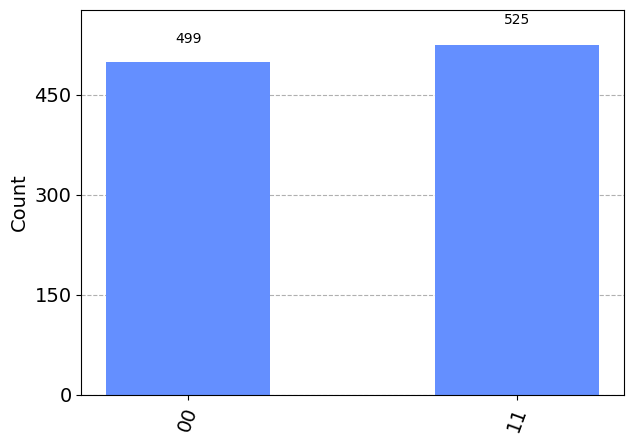

In [23]:
plot_histogram(result.get_counts(circuit))

In [24]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-04-15 23:57:07,119: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [25]:
provider = IBMQ.get_provider('ibm-q')

In [26]:
qcomp = provider.get_backend('ibmq_belem')

In [27]:
job = execute(circuit, backend=qcomp)

In [28]:
from qiskit.tools.monitor import job_monitor

In [29]:
job_monitor(job)

Job Status: job has successfully run


In [30]:
result = job.result()

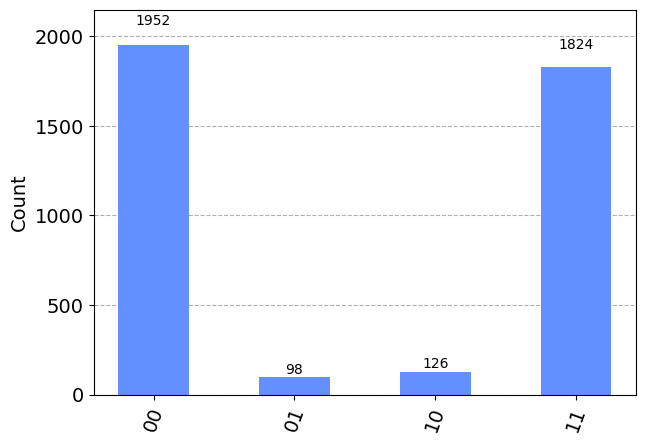

In [31]:
plot_histogram(result.get_counts(circuit))

ลอจิกเกต | Gates

In [32]:
from qiskit import *

In [33]:
from qiskit.tools.visualization import  plot_bloch_multivector

In [34]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend= simulator).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [35]:
circuit.draw()

┌───┐
  q: ┤ X ├
     └───┘
c: 1/═════

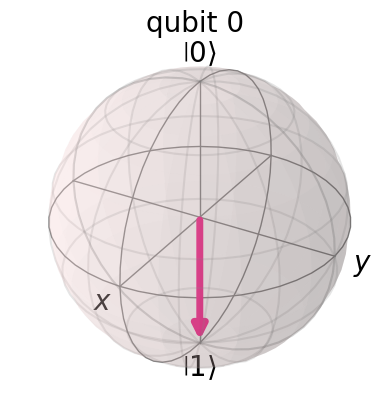

In [36]:
plot_bloch_multivector(statevector)

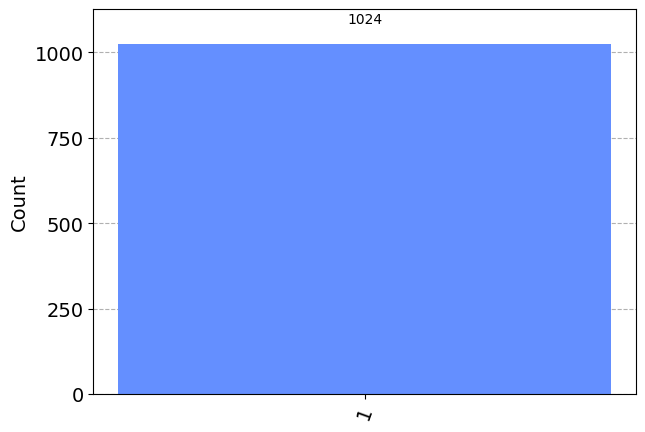

In [37]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= backend, shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import  plot_histogram
plot_histogram(counts)

In [38]:
circuit = QuantumCircuit(1,1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator')
result = execute(circuit, backend= simulator).result()
unitary = result.get_unitary()
print(unitary)

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


เทเลพอร์ต | Teleportation

In [39]:
from qiskit import *

In [40]:
circuit = QuantumCircuit(3, 3)

In [41]:
%matplotlib inline

In [42]:
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

In [43]:
circuit.x(0)
circuit.barrier()
circuit.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
           ░ 
q_2: ──────░─
           ░ 
c: 3/════════

In [44]:
circuit.h(1)
circuit.cx(1,2)

In [45]:
circuit.draw()

┌───┐ ░           
q_0: ┤ X ├─░───────────
     └───┘ ░ ┌───┐     
q_1: ──────░─┤ H ├──■──
           ░ └───┘┌─┴─┐
q_2: ──────░──────┤ X ├
           ░      └───┘
c: 3/══════════════════

In [46]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw()

┌───┐ ░                ┌───┐
q_0: ┤ X ├─░─────────────■──┤ H ├
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘
q_1: ──────░─┤ H ├──■──┤ X ├─────
           ░ └───┘┌─┴─┐└───┘     
q_2: ──────░──────┤ X ├──────────
           ░      └───┘          
c: 3/════════════════════════════

In [47]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├───────────░──╫──╫─
           ░      └───┘           ░  ║  ║ 
c: 3/════════════════════════════════╩══╩═
                                     0  1

In [48]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

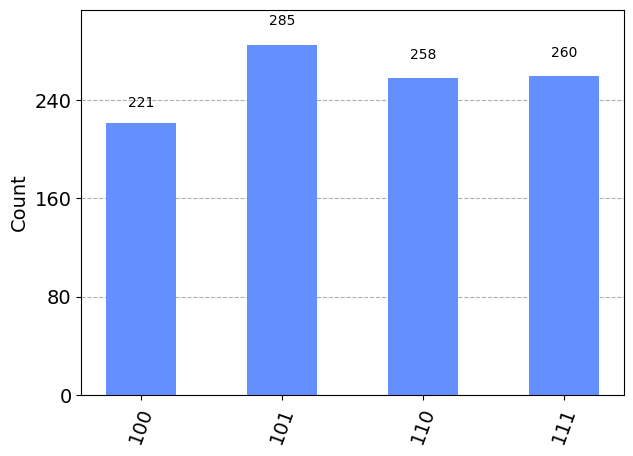

In [49]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [50]:
print(counts)

{'110': 258, '111': 260, '100': 221, '101': 285}


Bernstein Vazirani